In [1]:
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
pd.options.mode.chained_assignment = None  # default='warn'
import pyproj
import warnings
warnings.filterwarnings("ignore")

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')

<font size="15" color='#EACE09'><b>R</b></font><font size="15" color='black'><b>eally </b></font>  <font size="15" color='#EACE09'><b>I</b></font><font size="15" color='black'><b>mportant:</b></font>

<font size="15" color='black'><b>Investigating </b></font>
<font size="15" color='#EACE09'><b>Rapid Intensification </b></font>
<font size="15" color='black'><b>in Tropical Atlantic Stroms</b></font>

<font size="5" color='black'><b>Samuel LeBlanc</b></font>

<font size="5" color='black'><b>12/1/2021</b></font>

<font size=6 color='black'><b>What is</b></font> <font size=6 color='#EACE09'><b>Rapid Intensification</b></font><font size=6 color='black'><b>?</b></font>

**In meteorology, rapid intensification occurs when a tropical cyclone intensifies dramatically in a short period of time.**

**The National Hurricane Center defines rapid intensification as an increase in the maximum sustained winds of at least 30 knots (or 35 mph) in a 24-hour period.**

<font size=6 color='black'><b>Why should we care?</b></font>
    
**Hurricanes are notoriously difficult to predict, advanced meteorological models consistently have trouble predicting them even 24 hours in advance. Even with an accurate predicition (which are uncommon), the logisitics of mass evacuations create a public policy nightmare for any city in the path of a hurricane.**

**The situation is even worse if the hurricane undergoes a <font color='#EACE09'><b>Rapid Intensification</b></font> event. Hurricanes have been known to approach landfall as a Category 1 storm, lulling people into a false sense of security, only to rapidly intensify into a Category 4 storm and cause massive devastation.**

<font size=6 color='black'><b>Can we use data science and machine learning methods to predict whether a hurricane will </b></font><br><font size=6 color='#EACE09'><b>Rapidly Intensify</b></font><font size=6 color='black'><b>?</b></font> 

<font size=6 color='black'><b>What do scientists know about </b></font> <font size=6 color='#EACE09'><b>RI </b></font> <font size=6 color='black'><b>hurricanes?</b></font>

- **Potential for mass devastation**
- **Hard to predict**
- **Correlated with 3 meteorological factors**
    - **Warm, deep water**
    - **Low wind shear**
    - **High humidity**

<font size=6 color='black'><b>Considered Approach: </b></font> <font size=6 color='darkred'><b>Rapid Deepening</b></font>


**The NHC previously defined <font color='darkred'><b>Rapid Deepening</b></font> as when the minimum central pressure of a storm decreased by 42 millibars (1.240 inHg) over a 24-hour period. In the last decade, the NHC moved away from the 'pressue-based' RI defintion to the current 'wind-based' definition.**

**However, research suggests that mean sea level pressure may be a better predictor than wind speed for hurricanes making landfall in the continental United States.**

<font size=6 color='black'><b>HURDAT2 Data</b></font>

**The NHC has compiled the best tracks of all Atlantic storms for at least the last century (~1900 storms in total) into one .txt file. Each row is an observation for one storm, taken every 6 hours, usually...**

**Example for Hurricane Irene:**

`AL092011,  IRENE,  39,  
20110821, 0000, TS, 15.0N,  59.0W,  45, 1006,  105, 0, 0,45, ... ,
20110821, 0600, TS, 16.0N,  60.6W,  45, 1006,  130, 0, 0,80, ... ,
20110821, 1200, TS, 16.8N,  62.2W,  45, 1005,  130, 0, 0,70, ... ,
20110821, 1800, TS, 17.5N,  63.7W,  50,  999,  130,20, 0,70, ... ,
20110822, 0000, TS, 17.9N,  65.0W,  60,  993,  130,30,30,90, ... ,
20110822, 0600, HU, 18.2N,  65.9W,  65,  990,  130,60,60,90, ... ,
20110822, 1200, HU, 18.9N,  67.0W,  70,  989,  160,60,60,90, ... ,
20110822, 1800, HU, 19.3N,  68.0W,  75,  988,  160,60,40,90, ... , 
`

In [170]:
df = pd.read_pickle("11_25_21.pkl")

In [171]:
df[df.Code == "AL092017"] # Hurricane Harvey, 2017

,Code,Name,Record,Status,Lat,Lon,Wind,Pressure,DateTime,34kt_radius,50kt_radius,64kt_radius,Bearing,Distance,Speed,Rapid_NHC6,Rapid_NHC12,Rapid_NHC18,Rapid_NHC24,Accel
50252,AL092017,HARVEY,,LO,13.7,-45.8,25,1013,2017-08-16 06:00:00,0.0,0.0,0.0,0.000000,0.000000,0.000000,False,False,False,False,0.000000
50253,AL092017,HARVEY,,LO,13.7,-47.4,25,1010,2017-08-16 12:00:00,0.0,0.0,0.0,-89.810518,107.544676,17.924113,False,False,False,False,0.000000
50254,AL092017,HARVEY,,LO,13.6,-49.0,25,1009,2017-08-16 18:00:00,0.0,0.0,0.0,-93.467749,107.786809,17.964468,False,False,False,False,0.000000
50255,AL092017,HARVEY,,LO,13.6,-50.6,25,1010,2017-08-17 00:00:00,0.0,0.0,0.0,-89.811875,107.589983,17.931664,False,False,False,False,0.000000
50256,AL092017,HARVEY,,TD,13.4,-52.0,25,1008,2017-08-17 06:00:00,0.0,0.0,0.0,-98.141887,95.178876,15.863146,False,False,False,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50321,AL092017,HARVEY,,EX,36.0,-87.1,25,1002,2017-09-01 12:00:00,0.0,0.0,0.0,38.974537,97.985267,16.330878,False,False,False,False,-0.833333
50322,AL092017,HARVEY,,EX,36.5,-86.4,20,1004,2017-09-01 18:00:00,0.0,0.0,0.0,48.385803,52.122835,8.687139,False,False,False,False,-0.833333
50323,AL092017,HARVEY,,EX,37.2,-85.6,20,1007,2017-09-02 00:00:00,0.0,0.0,0.0,42.327297,65.539447,10.923241,False,False,False,False,0.000000
50324,AL092017,HARVEY,,EX,37.9,-84.9,20,1009,2017-09-02 06:00:00,0.0,0.0,0.0,38.313317,61.707229,10.284538,False,False,False,False,0.000000


# Part 1: Data Acquisition, Cleaning, and Outcome Indicator Creation

### Note 1: The format of the NHC HURDAT2.csv file

[From NHC] This dataset (known as Atlantic HURDAT2) has a comma-delimited, text format with six-hourly information on the location, maximum winds, central pressure, and (beginning in 2004) size of all known tropical cyclones and subtropical cyclones.

The format of the HURDAT file looks like this:

- **Storm Idenifier Row**
- *Strom Observation Row*
- *Strom Observation Row*
- *Strom Observation Row*
- **Storm Idenifier Row**
- *Strom Observation Row*
- *Strom Observation Row*
- *Strom Observation Row*
- *Strom Observation Row*

#### Important!
Within in an observation row, there is nothing that can identify which storm that the row belongs too.Thus, we need to add a storm identifier to each row for ease of use later. We do this in the `hurdat_lines_to_df` method below. 

See an example of the unchanged HURDAT data from Hurricane Irene below:

`AL092011,  IRENE,  39,  
20110821, 0000,  , TS, 15.0N,  59.0W,  45, 1006,  105, 0, 0,45, 0, 0, 0, 0, 0, 0, 0, 0,  
20110821, 0600,  , TS, 16.0N,  60.6W,  45, 1006,  130, 0, 0,80, 0, 0, 0, 0, 0, 0, 0, 0,  
20110821, 1200,  , TS, 16.8N,  62.2W,  45, 1005,  130, 0, 0,70, 0, 0, 0, 0, 0, 0, 0, 0,  
20110821, 1800,  , TS, 17.5N,  63.7W,  50,  999,  130,20, 0,70,30, 0, 0, 0, 0, 0, 0, 0,  
20110822, 0000,  , TS, 17.9N,  65.0W,  60,  993,  130,30,30,90,30, 0, 0,30, 0, 0, 0, 0,  
20110822, 0600,  , HU, 18.2N,  65.9W,  65,  990,  130,60,60,90,40,25,20,35,25, 0, 0, 0,  
20110822, 1200,  , HU, 18.9N,  67.0W,  70,  989,  160,60,60,90,40,25,20,35,25, 0, 0, 0,  
20110822, 1800,  , HU, 19.3N,  68.0W,  75,  988,  160,60,40,90,40,30,20,35,25, 0, 0, 0, `

The columns of the HURDAT file are as follows, refer to the link for more details.
- Date (YYYYMMDD)
- Time (24 hr)
- Record Identifier (see link for more info)
- Storm Status (Tropical Storm, Hurricane, etc. see link for more info)
- Latitude
- Longitude
- Maximum Sustained Wind Speed (kts)
- Minimum Pressure (mbar)
- 34 kt wind radii maximum extent in NE quadrant (in nautical miles)
- 34 kt wind radii maximum extent in SE quadrant (in nautical miles)
- 34 kt wind radii maximum extent in SW quadrant (in nautical miles)
- 34 kt wind radii maximum extent in NW quadrant (in nautical miles)
- 50 kt wind radii maximum extent in NE quadrant (in nautical miles)
- 50 kt wind radii maximum extent in SE quadrant (in nautical miles)
- 50 kt wind radii maximum extent in SW quadrant (in nautical miles)
- 50 kt wind radii maximum extent in NW quadrant (in nautical miles)
- 64 kt wind radii maximum extent in NE quadrant (in nautical miles)
- 64 kt wind radii maximum extent in SE quadrant (in nautical miles)
- 64 kt wind radii maximum extent in SW quadrant (in nautical miles)
- 64 kt wind radii maximum extent in NW quadrant (in nautical miles)

To learn more about the format of the HURDAT2 file, see the description at https://www.nhc.noaa.gov/data/hurdat/hurdat2-format-nov2019.pdf

### a) Read in data from official HURDAT2.csv file

Updated 10 June 2021 to include the 2020 season. These methods read in the raw HURDAT2 file and convert it into a lines object and then a dataframe. The method `hurdat_lines_to_df` adds the storm identifier "Code" to each row as described in Note 1.

In [2]:
def read_hurdat_lines():
    """
    read in official NHC HURDAT2.csv data file as line oject; 
    args: none; returns: line object
    """
    f = open("../data/HURDAT2.csv", "r")
    lines = f.readlines()
    f.close()
    return lines

In [3]:
def hurdat_lines_to_df(lines):
    """
    convert HURDAT lines object to dataframe, accounting for necessary formating of HURDAT data file, see note (1);
    args: lines object; returns: df with all storm observations, in tidy format(?)
    """
    hurdat=[] # to store all observations as nested list
    storm_info=[] # to store name and storm code
    df = pd.DataFrame()
    for line in lines:
        arr = line.split(",")
        # If this is a new storm, it will have "AL" in the first item ('AL' for Atlantic stroms)
        # Since this is a new storm, we need to update storm info and not add this 'observation' to list
        if "AL" in arr[0]: 
            storm_info = [arr[0],arr[1].strip()]
        # If this is the same storm as previous row, add new observation to list
        else:
            arr.insert(0,storm_info[0])
            arr.insert(1,storm_info[1])
            hurdat.append(arr) 
    df = pd.DataFrame(hurdat)
    return df

### b) Prettify the Dataframe (Rename, Strip, Retype)

Make the dataframe easier to work with by cleaning it up in several different ways

In [4]:
def rename_columns(df):
    """ rename columns from HURDAT file, see note (1); returns given dataframe """
    # note we are leaving the storm radii columns (index 10-21) alone for now, we deal with those later
    col_names = {
        df.columns[0]: 'Code',df.columns[1]: 'Name',  df.columns[2]: 'Date',
        df.columns[3]: 'Time', df.columns[4]: 'Record',df.columns[5]: 'Status',
        df.columns[6]: 'Lat',  df.columns[7]: 'Lon',   df.columns[8]: 'Wind',
        df.columns[9]: 'Pressure'
    }
    df = df.rename(columns = col_names) # rename columns according to dictionary
    return df

In [5]:
def strip_string_columns(df):
    """ Strip extra spaces on all object columns from raw HURDAT file; returns given dataframe """
    df_obj = df.select_dtypes(['object'])
    df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip()) # strip spaces from string columns
    return df

In [6]:
def retype_columns(df):
    """ convert column types into something more useful; returns given dataframe """
    df[['Wind','Pressure']] = df[['Wind','Pressure']].astype(str).astype(int)
    return df

#### HURDAT stores Date and Time seperately, but combining them into one datetime column makes life soo much better 😜

In [7]:
def create_datetime_column(df):
    """
    HURDAT data has date and time in seperate columns, but we combine into one DateTime;
    removes seperate date and time columns; 
    returns given dataframe
    """
    df["DateTime"] = df["Date"] + ' ' + df["Time"] # combine string columns
    df["DateTime"] = pd.to_datetime(df["DateTime"], format = '%Y%m%d %H%M') # convert to datetime object
    df = df.drop(columns=['Date', 'Time'], axis=1) # remove unneeded columns
    return df

### c) Convert coordinates from string (19.7W) to float (-19.7)

R (and others) understands coordinates better as numbers instead of text, so we convert the string coordinates to numerics 

In [8]:
def convert_coordinates(df):
    """
    convert HURDAT string coordinates to something that visualizations can understand (float between -180 and 180); 
    string coords have number and direction, we split and multiply by -1 depending on hemisphere;
    returns given dataframe
    """
    for direc in ['Lat','Lon']: # loop for both coordinates
        df[f'{direc}_Hemisphere'] = df[f'{direc}'].str[-1:] # get the direction string (N,E,S,W)
        df[f'{direc}'] = df[f'{direc}'].str[:-1].astype(float) # get numeric value
        # function to multiply value depending on direction string
        convert_direc = lambda row: row[f"{direc}"]*-1 if row[f"{direc}_Hemisphere"] in ['S','W'] else row[f"{direc}"]
        df[f'{direc}'] = df.apply(convert_direc, axis=1) # apply lambda func to get final readable coordinate
        df = df.drop(columns=[f"{direc}_Hemisphere"]) # remove unneeded column
    return df

### d) Create `Rapid_NHC{k}` columns

These columns denote whether a storm was Rapid Increasing (defined as an increase of 30 knots in Maximum Sustained Windspeed over the previous k hours) at the time of the observation.

The NHC defines RI as an increae of 30kts in wind speed over 24 hours (i.e. k=24). However, there is some debate in the literature over the arbitary nature of this definition, hence we include other RI indiciators as well. Specifically, whether the storm increased by 30kts in the last k hours, where k=6,12,18,24,30,36. 

We chose to split on 6 hour intervals because the HURDAT data comes on 6 hours intervals. Obviously, these are not equivalent metrics, a storm that increases by 30kts in 6 hours is on a rampage compared to one that does the same in the 6-times-as-long 36 hour window. We choose the use these different metrics because the ML model may have a better time predicting one compared to the other, but we shall see.

In [9]:
def within_k_hours(time, series, k):
    """
    get items in series whose datetime is within k hours of argument time;
    args: time (datetime), series (series) of HURDAT observations;
    return: series with items whose datetime is within 24 hours of the argument time
    """
    return (time-timedelta(hours=k) <= series) & (series <= time) 

In [10]:
def create_k_rapid_NHC_column(df, K):
    """
    exactly the same as 'create_rapid_NHC_column' but with variable amount of hours instead of only 24; 
    create boolean columns if storm was 'Rapidly Increasing' per modified NHC defn. at the time of the observation;
    we define modified defn. as RI if there is an increase of 30+ knots in k hours;
    args: df of storm observations, K (list) int list to create modified RI columns for each k hours in K
    """
    storm_codes = df.Code.unique() # list of unique stroms
    for index_storm, storm in enumerate(storm_codes): # iterate through all stroms 
        df_storm = df[df.Code == storm] # get df for each storm
        for k in K: # iterate through multiple new modified RI columns
            for index_row, row in df_storm.iterrows():
                # get current time and wind for the row
                current_time = row['DateTime']; 
                current_wind = row["Wind"] 
                
                # find all observations within k hours of current observation
                df_k_hours = df_storm[ within_k_hours(current_time, df_storm['DateTime'], k) ]
                
                # get minimum wind within k hours
                min_wind_k_hours = df_k_hours["Wind"].min() 
                
                # determine if strom was RI if it increased by 30mph in the last k hours
                df.loc[index_row,f"Rapid_NHC{k}"] = (current_wind - min_wind_k_hours ) > 30 
    return df

### e) Wind Speed Acceleration

Similar to the `Rapid_NHC{k}` columns, the `Acceleration` column gives the average acceleration of wind speed (in kts/hr) since the last observation. 

For example: If Storm X has a wind speed of 100 kts at 1200 and increased to 120 kts at 1800, it would have an average acceleration of 20/6 = 3.333 kts/hr.

Note: This calculation is made difficult by the sometimes inconsistent interval between observations. Observations usually come every 6 hours, but if the storm makes landfall inbetween, there will be a newobservation at that time. In theory I could remove observations not on the 6-hour interval but I don't want to do that.



In [11]:
def difference_in_hours(dt1,dt2):
    """
    calculate the difference between two datetimes in hours, copied from stack; 
    args: dt1 (datetime), dt2 (datetime); returns: hours between dt1 and dt2;
    """
    difference = dt1 - dt2 # get difference in datetime format
    days, seconds = difference.days, difference.seconds # extract days and seconds bc hours is not native(??)
    hours = days * 24 + seconds // 3600 # calculate hours
    return hours

In [12]:
def calculate_acceleration(delta_wind, delta_time):
    """
    calculate the acceleration per hour for a single strom interval;
    args: 
        delta_wind (float): the change in wind in an interval
        delta_time (float): the length in hours of the interval
    returns: acceleration per hour (float) of wind during the interval
    """
    try:
        accel = delta_wind/delta_time
    except:
        # if delta_time = 0, let acceleration = 0
        accel = 0
    # 25 mph change in one hour is far too high to be plausible, so return 0 because something went wrong
    return accel if abs(accel) < 25 else 0

In [13]:
def create_acceleration_column(df):
    """
    storm observations usually come every 6 hours, though not always. this method calculates the change in 
    acceleration since the last observation for that storm.
    returns the given dataframe, with a new column for accleration
    """
    df[f"Accel"] = 0 # set default acceleration to 0
    storm_codes = df.Code.unique() # get all unique storms
    # iterate through each storm code, create a dataframe for each strom
    for index_storm, storm in enumerate(storm_codes):
        df_storm = df[df.Code == storm] # get strom specific df
        current_wind = previous_wind = 0 # set default values to 0
        first_index = np.inf; # reset index to high number
        # loop through each row of the storm df
        for index_row, row in df_storm.iterrows():
            # record index of first row in storm df, to get assigned 0 acceleration later
            if index_row < first_index: first_index = index_row
            try:
                # get current weather values
                current_wind = df.iloc[index_row]['Wind']
                current_time = df.iloc[index_row]['DateTime']
                
                # get weather values for previous row
                previous_wind = df.iloc[index_row-1]['Wind']
                previous_time = df.iloc[index_row-1]['DateTime']
                
                # calculate change in time and wind, used to calculate accleration
                delta_wind = current_wind - previous_wind
                delta_time = difference_in_hours(current_time,previous_time)
                acceleration = calculate_acceleration(delta_wind,delta_time)
            except:
                acceleration = 0 # if any of the above failed, then set acceleration to 0
            df.loc[index_row,'Accel'] = acceleration # set acceleration in full dataframe
        df.loc[first_index,'Accel'] = 0 # set acceleration of first row in storm df to 0
        first_index = np.inf; # reset index of first row
    return df

### f) Calculate Radii of High Intensity

The last set of columns (the ones we ignored earlier) described the 'size' of the storm. Specifically, they give the maximum extent (in nautical miles) of a certain wind speed in one quadrant. Then, we average these four quadrants together to get the average maximum extent of the three wind speeds, 34kt, 50kt, and 64 kts. This tells us the average radius of the storm with wind speeds above these marks, giving us three proxies for 'storm size'.

In [14]:
def calculate_wind_radii(df):
    """
    calculate the average radius of different wind speed by average the wind extent in the four quadrants;
    HURDAT data has extent of 34,50,64kt winds in 4 quadrants (NW,SW,SE,NE), we average them to just 3 numbers;
    returns given dataframe, with 3 new columns for extent of 34,50,64kt winds
    """
    # get average of 4 quadrant observations for 3 wind categories, and record as single column
    df["34kt_radius"] = df[[10,11,12,13]].astype(str).astype(int).mean(axis=1) 
    df["50kt_radius"] = df[[14,15,16,17]].astype(str).astype(int).mean(axis=1)
    df["64kt_radius"] = df[[18,19,20,21]].astype(str).astype(int).mean(axis=1)
    df.drop(columns = [10,11,12,13,14,15,16,17,18,19,20,21,22], inplace=True) # drop unneeded columns
    return df

### g) Calculate Bearing, Distance, and Storm Speed

Create additional columns that may be useful to an ML model, including:
- Bearing: the bearing (direction) the storm is moving in (between -180 and 180)
- Distance: the distance the storm has traveled since the last observation in nautical miles
- Speed: the speed of the storm track (not wind speed) in knots

In [15]:
def create_bearing_column(df):
    geodesic = pyproj.Geod(ellps='WGS84')
    df[f"Bearing"] = 0 # set default bearing to 0
    df[f"Distance"] = 0 # set default bearing to 0
    df[f"Speed"] = 0 # set default bearing to 0
    storm_codes = df.Code.unique() # get all unique storms
    # iterate through each storm code, create a dataframe for each strom
    for index_storm, storm in enumerate(storm_codes):
        df_storm = df[df.Code == storm] # get strom specific df
        current_bearing = previous_bearing = 0 # set default values to 0
        first_index = np.inf; # reset index to high number
        
        # loop through each row of the storm df
        for index_row, row in df_storm.iterrows():
            
            # record index of first row in storm df, to get assigned 0 later
            if index_row < first_index: 
                first_index = index_row
                
            try:
                # calculate change in time since last obersvation
                current_time = df.iloc[index_row]['DateTime']
                previous_time = df.iloc[index_row-1]['DateTime']
                delta_time = difference_in_hours(current_time,previous_time)
                
                # get current position
                current_position = [df.iloc[index_row]['Lat'],df.iloc[index_row]['Lon']]
                
                # get previous position
                previous_position = [df.iloc[index_row-1]['Lat'],df.iloc[index_row-1]['Lon']]
                
                # use geodesic to calculate bearing and distance between observations
                bearing, back_bearing, distance = geodesic.inv(
                    previous_position[1], previous_position[0], current_position[1], current_position[0])
                
                # calculate distance and speed in nautical miles
                distance = distance/1852 # 1 nautical mile = 1852 meters
                speed = distance / delta_time
            except:
                # if any error occured, let all values equal 0
                bearing = 0; distance = 0; speed = 0;
                
            # set the values for the current row
            df.loc[index_row,'Bearing'] = bearing
            df.loc[index_row,'Distance'] = distance
            df.loc[index_row,'Speed'] = speed
            
        # set the values for the first row of storm
        df.loc[first_index,'Bearing'] = 0
        df.loc[first_index,'Distance'] = 0
        df.loc[first_index,'Speed'] = 0
        
        # reset index of first row
        first_index = np.inf; 
    return df

### h) Remove storms that do not reach Category X

Not all storms in HURDAT dataset are hurricanes, there are also distrubrances, waves, tropical storms and more. In fact, more than half of the storms do not reach the 64kt barrier to be classified as a category 1 hurricane. Beyond that, only 1/3 of all hurricanes are considered 'major', making it to category 3,4 or 5.

These methods helps to determine the category of the hurricane based on its wind speed. Then, we can remove storms that do not reach the desired category.

In [6]:
def calculate_category(wind):
    """
    args: wind speed; returns: storm category (0 to 5) based on the given wind speed
    """
    cat_breaks = [64,83,96,113,137,300]
    for i,cat in enumerate(cat_breaks):
        if wind > 0 and wind < cat:
            return i
    return 0

In [16]:
def remove_storms_below_cat_X(df, X):
    """
    remove storms from the full dataset if the storm did not reach category X;
    args: df: full strom df, X (int): remove stroms if they do not meet category X
    """
    if X not in range(1,6): return df # if not a valid storm category, retrun the full df
    # minimum wind speed for each category hurricane
    cat_X_minimum_wind_speeds = {1:64 , 2:83, 3:96, 4:113, 5:137} 
    # compare max wind speed of strom with desired category miniumum, remove storm if it does not reach threshold
    df = df[(df.groupby('Code')['Wind'].transform('max')) >= cat_X_minimum_wind_speeds[X]]
    return df

# Main

In [17]:
# Read in data
lines = read_hurdat_lines()
df = hurdat_lines_to_df(lines)

In [18]:
# Clean up dataframe
df = rename_columns(df)
df = strip_string_columns(df)
df = create_datetime_column(df)
df = retype_columns(df)

# Create new columns from calculations
df = convert_coordinates(df)
df = calculate_wind_radii(df)
df = create_bearing_column(df)
df = create_k_rapid_NHC_column(df,[6,12,18,24])
df = create_acceleration_column(df)

# Remove unneeded stroms
# df = remove_storms_below_cat_X(df,1)
# df = df.reset_index(drop=True)

# Create Pickle
d = datetime.today()
df.to_pickle(f"{d.month}_{d.day}_{d.year}.pkl")

AttributeError: 'int' object has no attribute 'month'

In [19]:
d = datetime.today()
df.to_pickle(f"{d.month}_{d.day}_{d.year}.pkl")

In [2]:
# Read Pickle
df = pd.read_pickle("11_27_2021.pkl")

### Write to .txt file for R visualization

In [3]:
storm_codes = df.Code.unique()
f = open('Storm_Track_Segments.csv',"w")
f.write(f"Code,Name,Year,Month,Hour,Lat1,Lon1,Lat2,Lon2,Wind,Pressure,Accel,Bearing,Speed,Distance,Rapid_NHC24,Rapid_NHC18,Rapid_NHC12,Rapid_NHC6,kt34,kt50,kt64,\n")
for storm_index, storm in enumerate(storm_codes):
    # get_progress(storm_index,len(storm_codes),10) 
    df_storm = df[df.Code == storm ]
    for i in range(len(df_storm)-1):
        Code = df_storm.iloc[i,:].Code
        Name = df_storm.iloc[i,:].Name
        Year = df_storm.iloc[i,:].DateTime.year
        Month = df_storm.iloc[i,:].DateTime.month
        Hour = df_storm.iloc[i,:].DateTime.hour
        Lat1 = df_storm.iloc[i,:].Lat
        Lon1 = df_storm.iloc[i,:].Lon
        Lat2 = df_storm.iloc[i+1,:].Lat
        Lon2 = df_storm.iloc[i+1,:].Lon
        Wind = df_storm.iloc[i,:].Wind
        Pressure = df_storm.iloc[i,:].Pressure
        Accel = df_storm.iloc[i,:].Accel
        Bearing = df_storm.iloc[i,:].Bearing
        Speed = df_storm.iloc[i,:].Speed
        Distance = df_storm.iloc[i,:].Distance
        Rapid_NHC24 = df_storm.iloc[i,:].Rapid_NHC24
        Rapid_NHC18 = df_storm.iloc[i,:].Rapid_NHC18
        Rapid_NHC12 = df_storm.iloc[i,:].Rapid_NHC12
        Rapid_NHC6 = df_storm.iloc[i,:].Rapid_NHC6
        kt34 = df_storm.iloc[i,:]['34kt_radius']
        kt50 = df_storm.iloc[i,:]['50kt_radius']
        kt64 = df_storm.iloc[i,:]['64kt_radius']
        f.write(f"{Code},{Name},{Year},{Month},{Hour},{Lat1},{Lon1},{Lat2},{Lon2},{Wind},{Pressure},{Accel},{Bearing},{Speed},{Distance},{Rapid_NHC24},{Rapid_NHC18},{Rapid_NHC12},{Rapid_NHC6},{kt34},{kt50},{kt64},\n")
f.close()

# Part 2: Create a Strom Dataframe

Now we transition our unit of analysis from an observation of a storm to the storm itself. This new dataframe will have one row per storm from the HURDAT dataset. Changing the unit of analysis will allow us to understand larger characteristics of the data.

In [4]:
def create_df_all(df):
    df_all = pd.DataFrame()
    codes = df.Code.unique()
    for code in codes:
        df_strom = df[df.Code == code]
        df_all = df_all.append({
            'Code'         : code,
            'Name'         : df_strom.iloc[0].Name,
            'Start_Date'   : df_strom.DateTime.min(),
            'End_Date'     : df_strom.DateTime.max(),
            'Min_Lat'      : df_strom.Lat.max(),
            'Max_Lat'      : df_strom.Lat.max(),
            'Min_Lon'      : df_strom.Lon.max(),
            'Max_Lon'      : df_strom.Lon.max(),
            'Max_Wind'     : df_strom.Wind.max(),
            'Min_Pressure' : df_strom.Pressure.max(),
            'Max_Accel'    : df_strom.Accel.max(),
            'Category'     : calculate_category(df_strom.Wind.max()),
            'Max_34kt'     : df_strom['34kt_radius'].max(),
            'Max_50kt'     : df_strom['50kt_radius'].max(),
            'Max_64kt'     : df_strom['64kt_radius'].max(),
            'Rapid_NHC6'   : df_strom.Rapid_NHC6.any(),
            'Rapid_NHC12'  : df_strom.Rapid_NHC12.any(),
            'Rapid_NHC18'  : df_strom.Rapid_NHC18.any(),
            'Rapid_NHC24'  : df_strom.Rapid_NHC24.any(),
        }, ignore_index=True)
        df_all.Category = df_all.Category.astype(int)
    return df_all


In [7]:
df = pd.read_pickle("11_27_2021.pkl")
df_all = create_df_all(df)

Now we can learn about characteristics of the all the recorded storms since 1850!

In [8]:
df_all.Rapid_NHC24.sum() / len(df_all)

0.170997920997921

Since records began in 1850, we find that 17% of recorded storms would have been classified as 'Rapidly Increasing' according to the NHC definition.

Let's see how that has changed over time. First, let's create a custom rounding function.

In [9]:
def custom_round(x, base=1):
    """ 
    custom rounding function that rounds down to the nearest base;
    args: 
        x (float): number to round
        base (float): base to round to
    returns:
        num (int): x rounded down the the nearest base
    """
    return int(base * math.floor(float(x)/base))

Then, we calculate the Year and Decade that each storm occurred in.

In [10]:
df_all['Year'] = pd.DatetimeIndex(df_all['Start_Date']).year
df_all['Decade'] = pd.DatetimeIndex(df_all['Start_Date']).year.astype(float)
df_all['Decade'] = df_all['Decade'].apply(lambda x: custom_round(x, base=10))

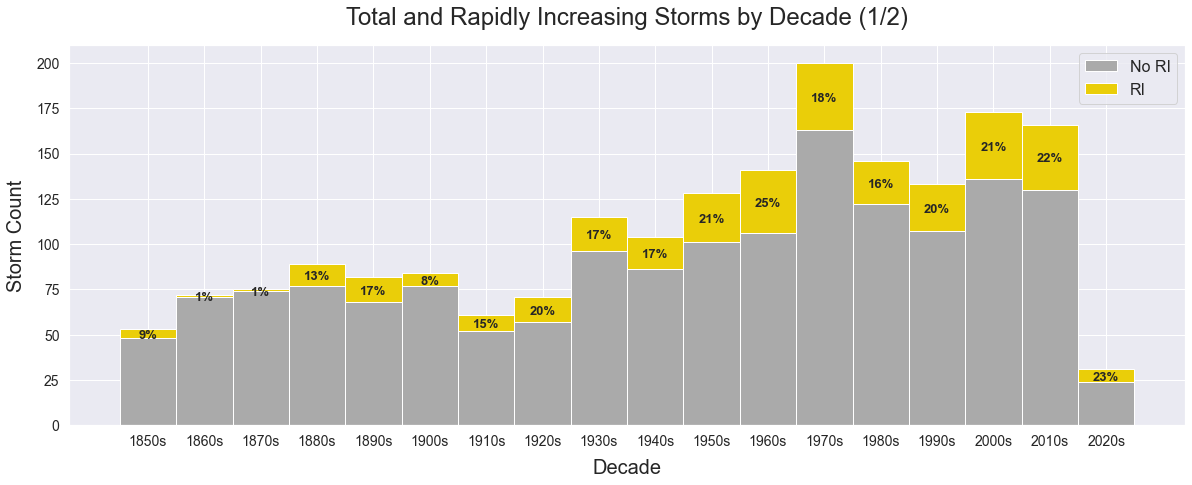

In [153]:
sns.set()
sns.set(rc = {'figure.figsize':(20,7)})

fig, ax = plt.subplots();

df2 = df_all.groupby(['Decade','Rapid_NHC24'])['Decade'].count().unstack('Rapid_NHC24').fillna(0)

colors = ['#aaaaaa', '#EACE09']
bottom = np.zeros(len(df2))

for i, col in enumerate(df2.columns):
  ax.bar(df2.index, df2[col], bottom=bottom, label=col, color=colors[i], width=10)
  bottom += np.array(df2[col])

# Sum up the rows of our data to get the total value of each bar.
totals = df2.sum(axis=1)
percs = df2[1.0]/(df2[1.0]+df2[0.0])

# Add labels to each bar.
for i, total in enumerate(totals):
  ax.text(totals.index[i], 
          df2.iloc[i][0.0] + .5*df2.iloc[i][1.0] - 2.7, 
          f"{int(100*round(percs.iloc[i],2))}%", 
          ha='center', weight='bold', fontsize=13)

plt.xticks(df2.index.to_numpy())
ax.set_xticklabels([ f"{d}s" for d in df2.index.to_numpy()])

plt.xlabel('Decade',fontsize=20,labelpad=10)
plt.ylabel('Storm Count',fontsize=20,labelpad=10)

ax.tick_params(axis='both', labelsize=14 )

ax.set_title('Total and Rapidly Increasing Storms by Decade (1/2)', fontsize=24, pad=20)
ax.legend(labels=('No RI','RI'), prop={'size': 16});


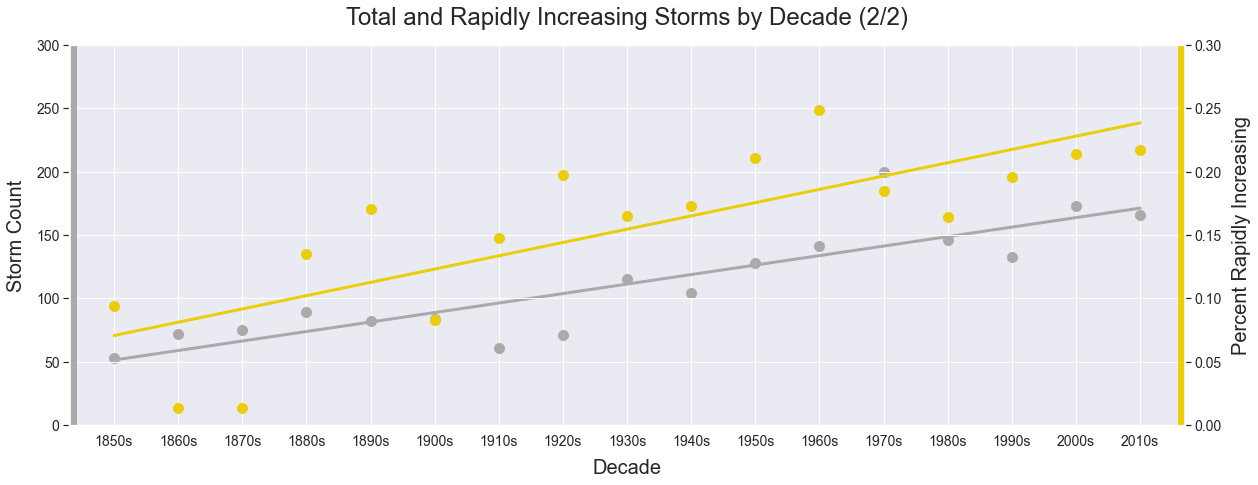

In [154]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from matplotlib.ticker import MaxNLocator

sns.set(rc = {'figure.figsize':(20,7)})

df2 = df_all.groupby(['Decade','Rapid_NHC24'])['Decade'].count().unstack('Rapid_NHC24').fillna(0)[:-1]
X = df2.index.to_numpy()
y_rapid = (df2[1.0]/(df2[1.0]+df2[0.0])).to_numpy()
y_all = df2.sum(axis=1).to_numpy()

X = df2.index.to_numpy().reshape(-1, 1)

reg_rapid = LinearRegression().fit(X, y_rapid)
reg_all = LinearRegression().fit(X, y_all)

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.set_ylim([0, 300])
ax_left.set_xlim([1843, 2017])
ax_right.set_ylim([0,0.30])

plt.xticks(np.arange(1850, 2020, step=10))
ax_left.set_xticklabels([ f"{d}s" for d in df2.index.to_numpy()])

ax_left.set_ylabel('Storm Count',fontsize=20,labelpad=10)
ax_right.set_ylabel('Percent Rapidly Increasing',fontsize=20,labelpad=10)
ax_left.set_xlabel('Decade',fontsize=20,labelpad=10)

ax_left.tick_params(axis='y', labelsize=14 )
ax_right.tick_params(axis='y', labelsize=14 )
ax_left.tick_params(axis='x', labelsize=14 )

ax_left.set_title('Total and Rapidly Increasing Storms by Decade (2/2)', fontsize=24, pad=20)

ax_left.plot(X, y_all, 'o', color='#aaaaaa', markersize=10)
ax_right.plot(X, y_rapid, 'o', color='#EACE09', markersize=10)
ax_left.plot(X, reg_all.predict(X), color='#aaaaaa', linewidth=3)
ax_right.plot(X, reg_rapid.predict(X), color='#EACE09', linewidth=3)

plt.axvline(x=1843.8, linewidth=6, color='#aaaaaa');
plt.axvline(x=2016.4, linewidth=6, color='#EACE09');

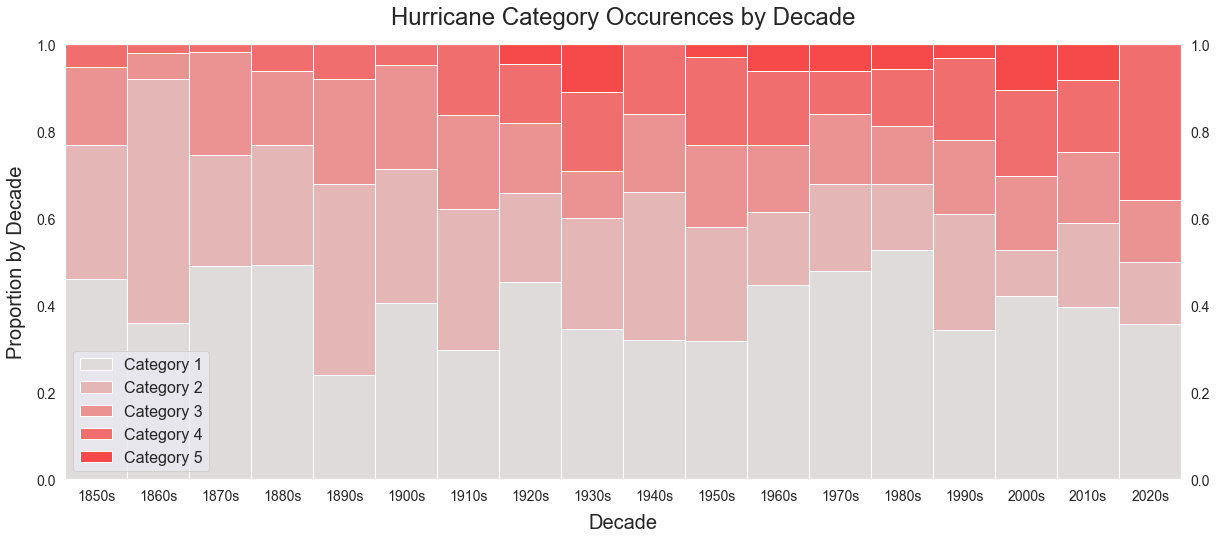

In [150]:
from matplotlib.colors import LinearSegmentedColormap

sns.set()
sns.set(rc = {'figure.figsize':(20,8)})

fig, ax = plt.subplots()

df2 = df_all.groupby(['Decade','Category'])['Decade'].count().unstack('Category').fillna(0)
df2 = df2.drop([2020],axis=0)

df2 = df_all.groupby(['Decade','Category'])['Decade'].count().unstack('Category').fillna(0)
df2 = df2.drop([0], axis=1)
df2 = df2.div(df2.sum(axis=1), axis=0)
colors = ['#F64A4A','#F06E6E','#EB9292','#E5B6B6','#E0DBDB']
bottom = np.zeros(len(df2))

for i, col in enumerate(df2.columns):
  ax.bar(df2.index, df2[col], bottom=bottom, label=col, color=colors[4-i], width=10)
  bottom += np.array(df2[col])

plt.xticks(np.arange(1850, 2030, step=10))
ax.set_xticklabels([ f"{d}s" for d in df2.index.to_numpy()])

ax.tick_params(axis='both', labelsize=14, labelright=True )
ax.set_xlim([1845, 2025])
ax.set_ylim([0, 1])

ax.set_ylabel('Proportion by Decade',fontsize=20,labelpad=10)
ax.set_xlabel('Decade',fontsize=20,labelpad=10)

ax.set_title('Hurricane Category Occurences by Decade', fontsize=24, pad=20)
ax.legend(labels=('Category 1','Category 2','Category 3','Category 4','Category 5'), prop={'size': 16});

### HURDAT Record Identifiers

These values provide additional information about a specific observation from a storm. The one we are most interested in is the 'L' identifier for Landfall.

While prediciting RI events anywhere is useful in theory, **we are most concerned with predicting RI when the storm is close to land.**

C – Closest approach to a coast, not followed by a landfall  
G – Genesis  
I – An intensity peak in terms of both pressure and wind  
L – Landfall (center of system crossing a coastline)  
P – Minimum in central pressure  
R – Provides additional detail on the intensity of the cyclone when rapid changes are underway  
S – Change of status of the system  
T – Provides additional detail on the track (position) of the cyclone     
W – Maximum sustained wind spee